## การสร้างแบบจำลอง Neural Network สำหรับทำนายช่วงราคาโทรศัพท์มือถือจากคุณสมบัติ

### 1. เตรียมข้อมูล

ก่อนอื่น คุณต้องดาวน์โหลดชุดข้อมูล "Phone Classification and Price Prediction Dataset" จาก Kaggle: [https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset](https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset)

เมื่อดาวน์โหลดข้อมูลแล้ว โหลดข้อมูลลงใน Python โดยใช้ Pandas library

In [85]:
import pandas as pd

# โหลดข้อมูล CSV ลงใน DataFrame
train = pd.read_csv("train.csv")
train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### 2. แสดงข้อมูล

หลังจากโหลดข้อมูลแล้ว ควรวิเคราะห์ข้อมูลเพื่อดูว่ามีข้อมูลที่ขาดหายไปหรือไม่ และเพื่อทำความเข้าใจการกระจายของข้อมูลใช้ Pandas library เพื่อดูสถิติข้อมูล

In [86]:
print(train.info())
print(train[::])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

จากข้อมูลจะมีทั้งหมด 2000 แถว 21 คอลัมน์ จะเห็นว่าข้อมูลทั้งหมดเป็นชนิดจำนวนเต็มและ  float สามารถนำไปสร้างแบบจำลอง NN ได้เนื่องจากตัวแบบต้องการข้อมูลที่เป็นตัวเลขเท่านั้น

### 3. แบ่งชุดข้อมูลสำหรับโมเดลแบบจำลอง

แบ่งเป็น 2 ส่วน ได้แก่ training & testing ออกเป็นอัตราส่วน 80:20

คุณต้องแบ่งข้อมูลออกเป็นชุดข้อมูลสำหรับฝึกอบรมและชุดข้อมูลสำหรับทดสอบ

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split

train1,test1 = train_test_split(train,test_size = 0.2)

print('ขนาดของข้อมูลทั้งหมด :',train.shape)
print('ขนาดของ training set :',train1.shape)
print('ขนาดของ testing set :',test1.shape)

ขนาดของข้อมูลทั้งหมด : (2000, 21)
ขนาดของ training set : (1600, 21)
ขนาดของ testing set : (400, 21)


### 4. สร้างโมเดล Neural Network

Model: "Price_mobile"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 512)               10752     
                                                                 
 hiddenlayer2 (Dense)        (None, 256)               131328    
                                                                 
 outputlayer (Dense)         (None, 4)                 1028      
                                                                 
Total params: 143108 (559.02 KB)
Trainable params: 143108 (559.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


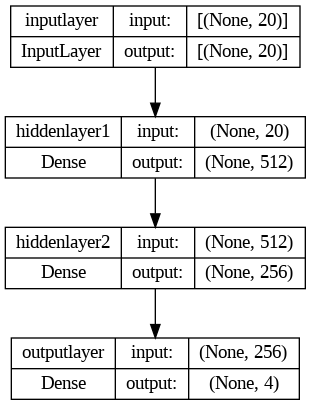

In [88]:
from keras import Sequential
from keras.layers import Input,Dense, Activation
from keras.utils import plot_model #วาด diagram ของแบบจำลอง

# สร้างโมเดล Sequential
model = Sequential()
model._name = 'Price_mobile'

# เพิ่มชั้น Dense
model.add(Input(shape = (20,),name = 'inputlayer'))
model.add(Dense(512, activation='relu', name = 'hiddenlayer1'))
model.add(Dense(256, activation='relu', name = 'hiddenlayer2'))
model.add(Dense(4, activation = 'softmax', name = 'outputlayer'))

# รวบรวมโมเดล
model.summary()

#สร้าง diagram
plot_model(model,to_file = model._name+'.png',show_shapes = True,show_layer_names= True)


### 5.การคอมไพล์แบบจำลอง โดยใช้ฟังก์ชั่น compile() ต้องระบุเทคนิคที่ใช้หาค่า weight ที่เหมาะสมที่สุด(optimizer) , loss function, metrics

In [91]:
model.compile(optimizer = 'Adamax', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### 6. ฝึกอบรมโมเดลแบบจำลอง นำข้อมูล training set แบ่งเป็น 2 ส่วน
ได้แก่
1)feature 2)outcome โดยใช้ฟังก์ชั่น iloc()

In [92]:
#แบ่งข้อมูลเป็น feature , outcome
train_X = train1.iloc[:,0:20]
train_y = train1.iloc[:,20]

# ฝึกอบรม
model.fit(train_X, train_y, batch_size=32 , epochs = 5)

Epoch 1/5
50/50 [==============================] - 1s 3ms/step - loss: 32.2361 - accuracy: 0.4894
Epoch 2/5
50/50 [==============================] - 0s 3ms/step - loss: 5.1436 - accuracy: 0.5675
Epoch 3/5
50/50 [==============================] - 0s 3ms/step - loss: 9.0099 - accuracy: 0.5281
Epoch 4/5
50/50 [==============================] - 0s 4ms/step - loss: 7.3406 - accuracy: 0.5681
Epoch 5/5
50/50 [==============================] - 0s 3ms/step - loss: 4.5225 - accuracy: 0.6169


### 7. ประเมินโมเดลแบบจำลอง โดยทดสอบกับ testing set เพื่อทดสอบว่าแบบจำลองที่ผ่านมาสามารถทำงานได้ดีเพียงใด

In [84]:
# ประเมินโมเดลบนชุดข้อมูลทดสอบ
test_X = test1.iloc[:,0:20]
test_y = test1.iloc[:,20:]
#evaluate model
loss, accuracy = model.evaluate(test_X, test_y,batch_size=10)
print('Loss: %2f'%loss)
print('Accuracy: %2f'%(accuracy*100))
#save model
model.save('model_pricemobile.h5')

40/40 [==============================] - 0s 2ms/step - loss: 10.7463 - accuracy: 0.4500
Loss: 10.746333
Accuracy: 44.999999


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 8. การใช้งานแบบจำลองด้วยการทำนายช่วงราคาโทรศัพท์มือถือ

In [ ]:
# ทำนายราคาโทรศัพท์มือถือใหม่
deploymodel_pricemobile = load_model('model_pricemobile.h5')
new_data = [[1, 4, 64, 6]]  # ตัวอย่างข้อมูลใหม่
predicted_price = deploymodel_pricemobile.predict(new_data)
print('ข้อมูล Feature ของ mobile  : ->',new_data)
print('ผลการทำนายช่วงราคาโทรศัพท์คือ : ',predicted_price)